In [1]:
import pandas as pd 
import datetime as dt
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot, figure

C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [3]:
df = pd.read_csv("anaemia_women.csv")


In [4]:
df

,Unnamed: 0,Country_code,Country_name,Income_level,Region,Year,Anaemia_Prevalence,Anaemia_Num(Thousands)
0,0,AFG,Afghanistan,Low,Eastern Mediterranean,2000,35.7,1527.562
1,1,AFG,Afghanistan,Low,Eastern Mediterranean,2001,35.6,1583.932
2,2,AFG,Afghanistan,Low,Eastern Mediterranean,2002,35.4,1653.172
3,3,AFG,Afghanistan,Low,Eastern Mediterranean,2003,35.4,1738.555
4,4,AFG,Afghanistan,Low,Eastern Mediterranean,2004,35.5,1831.288
...,...,...,...,...,...,...,...,...
3795,3795,ZWE,Zimbabwe,Low-Mid,Africa,2015,29.1,1045.381
3796,3796,ZWE,Zimbabwe,Low-Mid,Africa,2016,28.9,1051.989
3797,3797,ZWE,Zimbabwe,Low-Mid,Africa,2017,28.8,1061.889
3798,3798,ZWE,Zimbabwe,Low-Mid,Africa,2018,28.8,1077.339


In [5]:
countries = df["Country_name"].unique()

In [6]:
countries

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia (Plurinational State of)', 'Brazil',
       'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Côte d'Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Congo', 'Cook Islands',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia (Federated States of)', 'Gabon',
       'United Kingdom of Great Britain

In [7]:
# list of top 60 countries by population (worldometer.com)
top_50_countries = [
    "China",
    "India",
    "United States of America",
    "Indonesia",
    "Pakistan",
    "Brazil",
    "Nigeria",
    "Bangladesh",
    "Russian Federation",
    "Mexico",
    "Japan",
    "Ethiopia",
    "Philippines",
    "Egypt",
    "Viet Nam",
    "Democratic Republic of the Congo",
    "Iran (Islamic Republic of)",
    "Germany",
    "Thailand",
    "United Kingdom of Great Britain and Northern Ireland",
    "France",
    "Italy",
    "United Republic of Tanzania",
    "South Africa",
    "Myanmar",
    "Kenya",
    "Republic of Korea",
    "Colombia",
    "Spain",
    "Uganda",
    "Argentina",
    "Algeria",
    "Sudan",
    "Ukraine",
    "Iraq",
    "Afghanistan",
    "Canada",
    "Morocco",
    "Saudi Arabia",
    "Uzbekistan",
    "Peru",
    "Malaysia",
    "Mozambique",
    "Ghana",
    "Nepal",
    "Venezuela (Bolivarian Republic of)",
    "Madagascar",
    "Cameroon",
    "Côte d'Ivoire",
    "Australia"
]

In [8]:
####### LOOP THROUGH EACH COUNTRY WITH THE ARIMA MODEL AND APPEND THE FORECAST DATA TO A NEW DF ###########

In [9]:
test_appended_df = pd.DataFrame()

In [10]:

for i in top_50_countries:
    print(i)
    country_input = i
    single_country_df = df[df["Country_name"] == i]
    single_country_df_clean = single_country_df[["Year","Anaemia_Num(Thousands)","Country_name"]]
    country_df = single_country_df_clean.reset_index(drop=True)
    country_df["Year"]  = pd.to_datetime(country_df["Year"].astype(str), format = "%Y")
    country_df.set_index("Year", inplace=True)
    country_df_for_model = country_df[["Anaemia_Num(Thousands)"]]
    model = ARIMA(country_df_for_model, order=(5,1,0))
    model_fit = model.fit()
    forecast_df = model_fit.get_forecast(6, alpha=0.05).summary_frame()
    forecast_df["Country_name"] = country_input
    future_df = pd.concat([country_df,forecast_df])
    test_appended_df = pd.concat([test_appended_df,future_df])



China
India
United States of America


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Indonesia
Pakistan
Brazil
Nigeria


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Bangladesh
Russian Federation
Mexico
Japan


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Ethiopia
Philippines
Egypt
Viet Nam


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Democratic Republic of the Congo
Iran (Islamic Republic of)
Germany


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Thailand
United Kingdom of Great Britain and Northern Ireland
France
Italy


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

United Republic of Tanzania
South Africa
Myanmar
Kenya


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Republic of Korea
Colombia
Spain
Uganda


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Argentina
Algeria
Sudan
Ukraine


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Iraq
Afghanistan
Canada


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Morocco
Saudi Arabia
Uzbekistan
Peru
Malaysia


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Mozambique
Ghana
Nepal
Venezuela (Bolivarian Republic of)
Madagascar


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

Cameroon
Côte d'Ivoire
Australia


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\base\model.py:606: C

In [11]:
test_appended_df.head(50)

,Anaemia_Num(Thousands),Country_name,mean,mean_se,mean_ci_lower,mean_ci_upper
2000-01-01,79563.801,China,NaN,NaN,NaN,NaN
2001-01-01,76520.032,China,NaN,NaN,NaN,NaN
2002-01-01,74488.868,China,NaN,NaN,NaN,NaN
2003-01-01,72780.049,China,NaN,NaN,NaN,NaN
2004-01-01,71106.276,China,NaN,NaN,NaN,NaN
2005-01-01,69029.713,China,NaN,NaN,NaN,NaN
2006-01-01,66755.520,China,NaN,NaN,NaN,NaN
2007-01-01,64498.979,China,NaN,NaN,NaN,NaN
2008-01-01,62415.887,China,NaN,NaN,NaN,NaN
2009-01-01,60270.218,China,NaN,NaN,NaN,NaN


In [12]:
test_appended_df.to_csv("anaemia_women_forecast.csv")

#########################################################################################################

# This was the test for one country input

In [13]:
########################## CHOOSE COUNTRY ##########################
country_input = "Australia"
single_country_df = df[df["Country_name"] == country_input]
single_country_df = single_country_df[["Year","Anaemia_Num(Thousands)","Country_name"]]
country_df = single_country_df.reset_index(drop=True)
country_df["Year"]  = pd.to_datetime(country_df["Year"].astype(str), format = "%Y")
country_df.set_index("Year", inplace=True)
country_df_for_model = country_df[["Anaemia_Num(Thousands)"]]

#### FORECAST MODEL: ARIMA

In [14]:
model = ARIMA(country_df_for_model, order=(5,1,0))
model_fit = model.fit()
forecast_df = model_fit.get_forecast(6, alpha=0.05).summary_frame()
# print(model_fit.summary())
future_df = pd.concat([country_df,forecast_df])

C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


#### Plot model

Text(0.5, 1.0, 'Anaemic women in Australia')

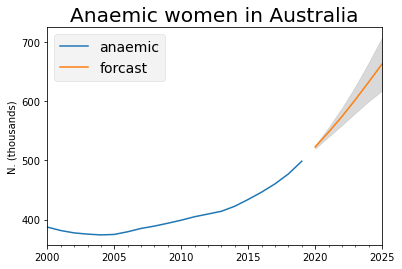

In [15]:
#import seaborn as sns
future_df[["Anaemia_Num(Thousands)","mean"]].plot()
plt.style.use('fivethirtyeight')
plt.fill_between(future_df.index, future_df["mean_ci_lower"],future_df["mean_ci_upper"], color='k',alpha=.15)
plt.legend(['anaemic','forcast'])
plt.ylabel('N. (thousands)')
plt.title(f'Anaemic women in {country_input}')

## measuring the accuracy of model prediction

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from math import sqrt

In [17]:

country_input = "Argentina"
single_country_df = df[df["Country_name"] == country_input]
single_country_df = single_country_df[["Year","Anaemia_Num(Thousands)","Country_name"]]
country_df = single_country_df.reset_index(drop=True)
country_df["Year"]  = pd.to_datetime(country_df["Year"].astype(str), format = "%Y")
country_df.set_index("Year", inplace=True)
country_df_for_model = country_df[["Anaemia_Num(Thousands)"]]
df_train = country_df_for_model[: "2015-01-01"]
df_dev = country_df_for_model["2016-01-01":]
model = ARIMA(df_train, order=(5,1,0))
model_fit = model.fit()
forecast_df = model_fit.get_forecast(4, alpha = 0.05).summary_frame()
forecast = forecast_df["mean"].tolist()
actual = df_dev["Anaemia_Num(Thousands)"].tolist()
mae = mean_absolute_error(actual,forecast)
print(f'mean absolute error: {mae}')
mse = mean_squared_error(actual, forecast)
print(f'mean square error: {mse}')
rmse = sqrt(mse)
print(f'root mean square error: {rmse}')
mape = mean_absolute_percentage_error(actual,forecast)
print(f'mean absolute percentage error: {mape*100}')

mean absolute error: 33.83789907566825
mean square error: 1646.6618231910543
root mean square error: 40.57908110333518
mean absolute percentage error: 2.5416469240497586


C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [18]:
test_appended_df = pd.DataFrame()

In [19]:
for i in top_50_countries:
    country_input = i
    single_country_df = df[df["Country_name"] == country_input]
    single_country_df = single_country_df[["Year","Anaemia_Num(Thousands)","Country_name"]]
    country_df = single_country_df.reset_index(drop=True)
    country_df["Year"]  = pd.to_datetime(country_df["Year"].astype(str), format = "%Y")
    country_df.set_index("Year", inplace=True)
    country_df_for_model = country_df[["Anaemia_Num(Thousands)"]]
    df_train = country_df_for_model[: "2015-01-01"]   #train model with 80% of data
    df_test = country_df_for_model["2016-01-01":]     
    model = ARIMA(df_train, order=(5,1,0))
    model_fit = model.fit()
    forecast_df = model_fit.get_forecast(4, alpha = 0.05).summary_frame()
    forecast = forecast_df["mean"].tolist()
    actual = df_test["Anaemia_Num(Thousands)"].tolist()
    mae = mean_absolute_error(actual,forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(actual,forecast)
    measures = [rmse,mape]
    measures_df = pd.DataFrame({
        "country":[i],
        "rmse":[rmse],
        "mape":[mape*100]        
    })
    
    
    test_appended_df = pd.concat([test_appended_df,measures_df])

C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Laura\anaconda3\envs\pythondata2\lib\site-packages\statsmodels\tsa\base\tsa_model.p

In [20]:
test_appended_df

,country,rmse,mape
0,China,781.519492,1.236844
0,India,2866.543645,1.388010
0,United States of America,302.819561,2.798776
0,Indonesia,581.588739,2.134223
0,Pakistan,362.625317,1.449710
0,Brazil,89.725829,0.889140
0,Nigeria,224.367114,0.653078
0,Bangladesh,31.710167,0.135291
0,Russian Federation,118.924522,1.489372
0,Mexico,167.168185,2.567522


In [21]:
test_appended_df.to_csv("model_performance_women.csv")